In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def euler_sde(time, initial_condition, drift_function, diffusion_constant):
    """
    Solves a stochastic differential equation using the Euler-Maruyama method.

    Args:
        time (np.ndarray): Array of time points.
        initial_condition (float): Initial value of the variable.
        drift_function (callable): Function that computes the drift term.
                                   It should take the current value and
                                   return the drift at that time.
        diffusion_constant (float): The standard deviation of the noise term.

    Returns:
        np.ndarray: Array of the variable's values at each time point.
    """
    dt = time[1] - time[0]
    num_steps = len(time)
    solution = np.zeros(num_steps)
    solution[0] = initial_condition
    dW = np.random.normal(loc=0, scale=np.sqrt(dt), size=num_steps - 1)
    for i in range(num_steps - 1):
        solution[i + 1] = solution[i] + drift_function(solution[i]) * dt + diffusion_constant * dW[i]
    return solution


In [3]:
def theta_model_stochastic(theta, I):
    """
    Computes the drift term of the stochastic theta model ODE.

    Args:
        theta (float): The current phase of the oscillator.
        I (float): The input current.

    Returns:
        float: The drift term d(theta)/dt.
    """
    d_theta_dt = (1 - np.cos(theta)) + (1 + np.cos(theta)) * I
    return d_theta_dt

if __name__ == "__main__":
    # Define time parameters for longer simulations
    t_start = 0
    t_end = 300
    dt = 0.1
    time = np.arange(t_start, t_end, dt)

    # Initial condition
    theta_0 = 0.1
    sigma = 0.5  # Noise standard deviation

    # 6. Play with the values of I
    input_currents = [-0.5, -0.1, 0.1, 0.5]
    num_realizations = 5  # Run each simulation multiple times

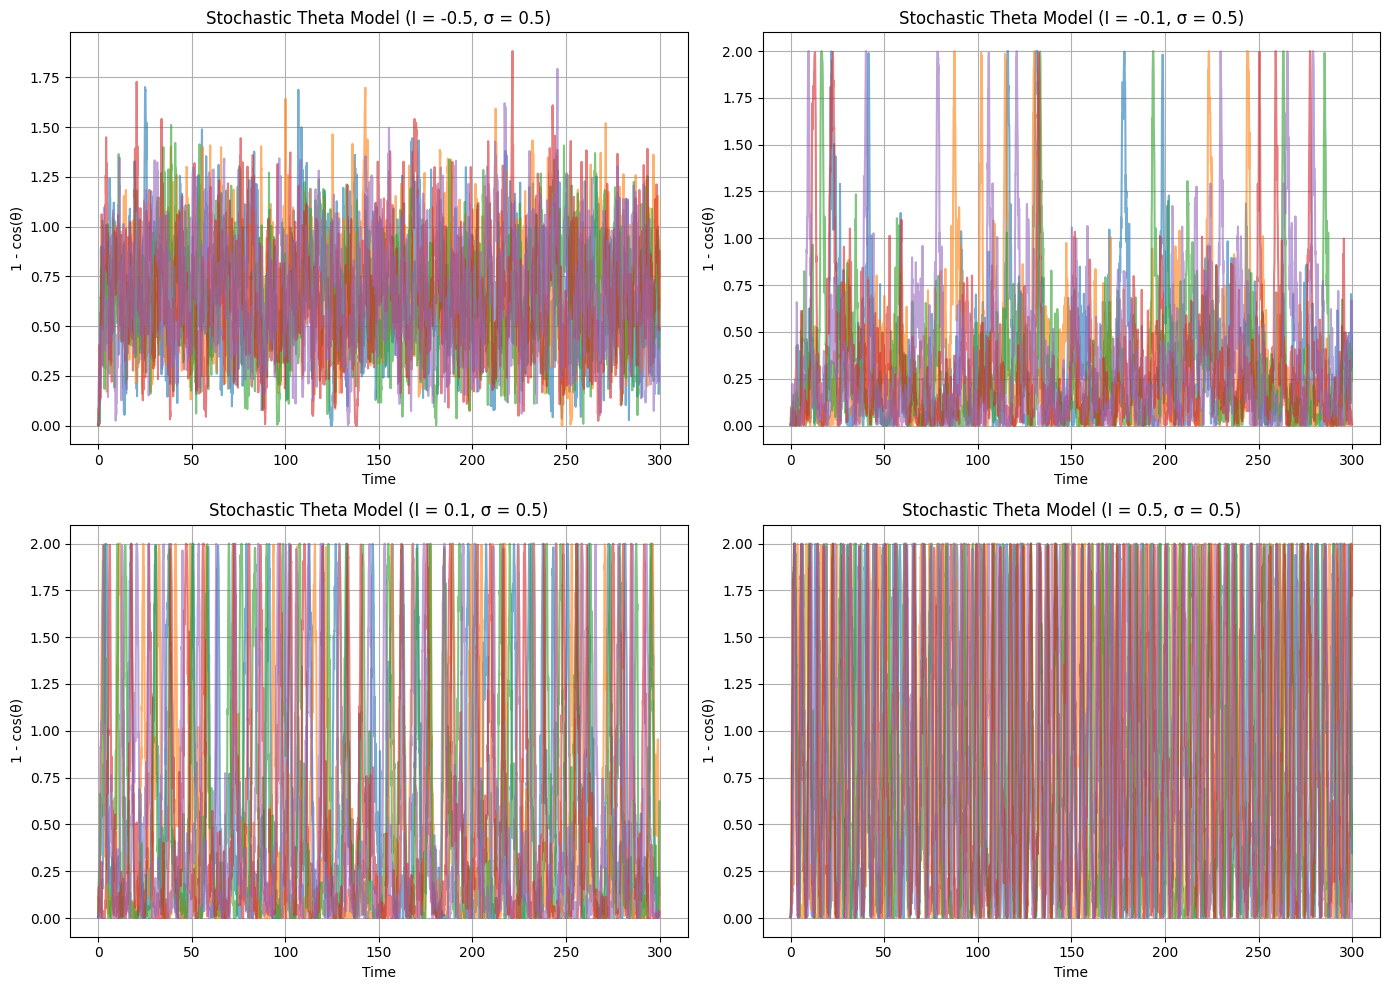


Observations on the effect of noise:
- With a noise level of σ = 0.5:

For I = -0.5 (deterministic steady state):
- The addition of noise introduces fluctuations around the deterministic steady-state value.
- The oscillator no longer stays perfectly at the fixed point but exhibits random movements.

For I = -0.1 (deterministic steady state):
- Similar to I = -0.5, noise causes the system to fluctuate around its deterministic fixed point.
- The magnitude of the fluctuations is determined by σ.

For I = 0.1 (deterministic oscillations):
- Noise disrupts the regular oscillations observed in the deterministic case.
- The amplitude and frequency of the oscillations become irregular and vary with each noise realization.
- The noise can also induce phase slips or cycle skipping, where the oscillator temporarily deviates significantly from its regular rhythm.

For I = 0.5 (deterministic oscillations):
- Similar to I = 0.1, noise makes the oscillations irregular.
- The frequency might appear m

In [4]:
    plt.figure(figsize=(14, 10))
    for i, I in enumerate(input_currents):
        plt.subplot(2, 2, i + 1)
        for _ in range(num_realizations):
            theta_stochastic = euler_sde(time, theta_0, lambda theta: theta_model_stochastic(theta, I), sigma)
            transformation_stochastic = 1 - np.cos(theta_stochastic)
            plt.plot(time, transformation_stochastic, alpha=0.6)
        plt.title(f'Stochastic Theta Model (I = {I}, σ = {sigma})')
        plt.xlabel('Time')
        plt.ylabel('1 - cos(θ)')
        plt.grid(True)
    plt.tight_layout()
    plt.show()

    print("\nObservations on the effect of noise:")
    print(f"- With a noise level of σ = {sigma}:")

    print("\nFor I = -0.5 (deterministic steady state):")
    print("- The addition of noise introduces fluctuations around the deterministic steady-state value.")
    print("- The oscillator no longer stays perfectly at the fixed point but exhibits random movements.")

    print("\nFor I = -0.1 (deterministic steady state):")
    print("- Similar to I = -0.5, noise causes the system to fluctuate around its deterministic fixed point.")
    print("- The magnitude of the fluctuations is determined by σ.")

    print("\nFor I = 0.1 (deterministic oscillations):")
    print("- Noise disrupts the regular oscillations observed in the deterministic case.")
    print("- The amplitude and frequency of the oscillations become irregular and vary with each noise realization.")
    print("- The noise can also induce phase slips or cycle skipping, where the oscillator temporarily deviates significantly from its regular rhythm.")

    print("\nFor I = 0.5 (deterministic oscillations):")
    print("- Similar to I = 0.1, noise makes the oscillations irregular.")
    print("- The frequency might appear more variable compared to the deterministic case.")
    print("- Higher noise levels can even lead to the temporary disappearance of clear oscillatory patterns.")

    print("\nDoes a given level of noise σ produce similar effects at different values of I?")
    print("- The absolute magnitude of the noise (determined by σ) is the same across different values of I. However, its *relative* effect on the dynamics depends on the underlying deterministic behavior.")
    print("- In the steady-state regime (I = -0.5, I = -0.1), the noise causes deviations from a fixed value. The extent of these deviations is similar in magnitude (proportional to σ), but their relative impact might seem different depending on how stable the fixed point is.")
    print("- In the oscillatory regime (I = 0.1, I = 0.5), the noise disrupts the oscillations. The impact can be significant, leading to irregular amplitudes, frequencies, and even loss of coherent oscillations. The degree of disruption might depend on the intrinsic frequency of the oscillator (which is influenced by I).")

    print("\nWhy the different effects?")
    print("- In the steady-state regime, the deterministic dynamics have a strong restoring force towards the fixed point. Noise acts as a perturbation away from this point. The system continuously tries to return to the fixed point, resulting in fluctuations around it.")
    print("- In the oscillatory regime, the deterministic dynamics involve a continuous cycle. Noise can perturb the phase and amplitude of this cycle at any point. These perturbations can accumulate over time, leading to significant deviations from the regular oscillations. The sensitivity to noise might be higher in regimes where the deterministic dynamics are less robust.")
